# Veryfying the trigger LPP Listen

## From Audio file

In [5]:
import wave
import numpy as np
import matplotlib.pyplot as plt

# Ouvrir le fichier audio
filepath = '/media/co/T7/workspace-LPP/data/MEG/LPP/PallierRead2023/download/sourcedata/stimuli/audio/ch1-3.wav'

with wave.open(filepath, 'rb') as wf:
    # Obtenir les paramètres du fichier
    num_channels = wf.getnchannels()
    sample_width = wf.getsampwidth()
    frame_rate = wf.getframerate()
    num_frames = wf.getnframes()
    
    # Lire les données audio
    raw_data = wf.readframes(num_frames)

# Convertir les données brutes en tableau numpy
data = np.frombuffer(raw_data, dtype=np.int16)

# Séparer les canaux (en supposant un fichier stéréo)
if num_channels == 2:
    channel_1 = data[0::2]
    channel_2 = data[1::2]
else:
    raise ValueError("Le fichier doit être stéréo (2 canaux)")

# Définir un seuil pour détecter les créneaux (à ajuster selon vos besoins)
threshold = np.max(channel_2) * 0.5

# Trouver les indices où le signal dépasse le seuil
creneaux = np.where(channel_2 > threshold)[0]

# Trouver les débuts des créneaux (en ignorant les valeurs consécutives)
debuts_creneaux = creneaux[np.insert(np.diff(creneaux) > 1, 0, True)]

# Convertir les indices en temps (en secondes)
timings = debuts_creneaux / frame_rate


In [11]:
# Open the metadata file and extract the triggers 
filepath = '/media/co/T7/workspace-LPP/data/MEG/LPP/PallierListen2023/download/sub-1/ses-01/meg/sub-1_ses-01_task-listen_run-01_events.tsv' 
import pandas as pd
df = pd.read_csv(filepath, sep='\t')
# Compare the timings with the df.onset
timings_metadata = df.onset


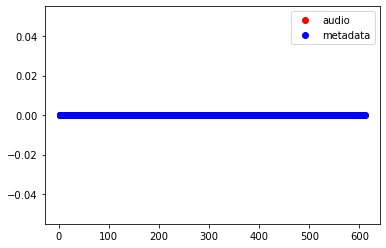

[0. 0. 0. ... 0. 0. 0.]
1.9614456251169395e-06
6.284727779849602e-06
-18
18


<ipython-input-13-09f2e627441f>:10: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  distances = cdist(timings[:, None], timings_metadata[:, None])


In [13]:
# Compare the two
plt.figure()
plt.plot(timings, np.zeros_like(timings), 'ro', label='audio')
plt.plot(timings_metadata, np.zeros_like(timings_metadata), 'bo', label='metadata')
plt.legend()
plt.show()

# Get a metric of the matching 
from scipy.spatial.distance import cdist
distances = cdist(timings[:, None], timings_metadata[:, None])
min_distances = np.min(distances, axis=1)
print(min_distances)
print(np.mean(min_distances))
print(np.std(min_distances))

# Get number of non-matching triggers
print(len(timings) - len(timings_metadata))
print(len(timings_metadata) - len(timings))

